In [1]:
#Starter code: write your name, ID number
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
# Load full CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print("Full training set:", x_train.shape, y_train.shape)
# Select only the first 5000 images
x_subset = x_train[:5000]
y_subset = y_train[:5000]
print("Subset shape:", x_subset.shape, y_subset.shape) # (5000, 32, 32, 3), (5000, 1)
# CIFAR-10 class names
class_names = ['airplane','automobile','bird','cat','deer',
 'dog','frog','horse','ship','truck']
# TODO: Place your code here for the creation of the model

2025-10-03 11:21:42.764548: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-03 11:21:42.830254: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-03 11:21:44.211270: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


Full training set: (50000, 32, 32, 3) (50000, 1)
Subset shape: (5000, 32, 32, 3) (5000, 1)


**Denoising Autoencoder**
*   Philip Jeremiah Caleon
*   12013544

Download this link:
[Image](https://drive.google.com/file/d/1TLYDxKhdD-DJhQ805iIfs6V_e8vZblwU/view)

# Extracting Image

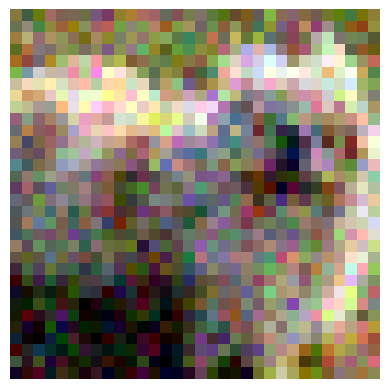

In [2]:
from PIL import Image
import matplotlib.pyplot as plt

# Path to your PNG file
img_path = "/home/pj/Documents/Academics/CPECOG3/noisy_image3.png"

# Open the image
img = Image.open(img_path)

# Display with matplotlib
plt.imshow(img)
plt.axis("off")
plt.show()


# Import

In [3]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# Preprocess data

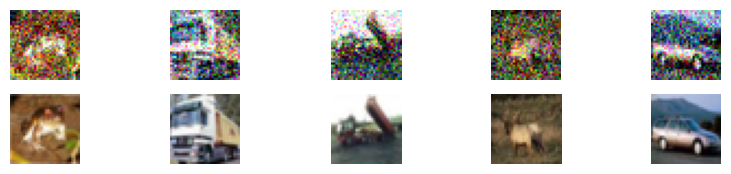

In [4]:
# Load CIFAR-10
(x_train, _), (x_test, _) = cifar10.load_data()

# Select subset
x_subset = x_train[:5000]

# Normalize to 0–1
x_subset = x_subset.astype("float32") / 255.0
x_test   = x_test.astype("float32") / 255.0

# Add synthetic noise to the images
noise_factor = 0.2
x_subset_noisy = x_subset + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_subset.shape)
x_test_noisy   = x_test   + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip values to stay in [0,1]
x_subset_noisy = np.clip(x_subset_noisy, 0., 1.)
x_test_noisy   = np.clip(x_test_noisy, 0., 1.)

# Show a few noisy vs clean pairs
plt.figure(figsize=(10, 2))
for i in range(5):
    # Noisy image
    ax = plt.subplot(2, 5, i+1)
    plt.imshow(x_subset_noisy[i])
    plt.axis("off")
    
    # Clean image
    ax = plt.subplot(2, 5, i+1+5)
    plt.imshow(x_subset[i])
    plt.axis("off")
plt.show()

# Model

In [5]:
# input layer

from keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras import layers, models

# Create the autoencoder model based from the illustrated model plot
# Save the model as autoencoder_cnn variable
### --YOUR CODE HERE-- ###
input_img = layers.Input(shape=(32,32,3))

In [6]:
## Encoder

# Conv2d
x = layers.Conv2D(32, (3,3), activation="relu", padding="same")(input_img) 

# Max Pooling 2D
x = layers.MaxPooling2D((2,2), padding="same")(x)

# Conv2d
x = layers.Conv2D(32, (3,3), activation="relu", padding="same")(x)

# Max Pooling 2D
encoded = layers.MaxPooling2D((2,2), padding="same")(x)

I0000 00:00:1759461953.820882   12602 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1729 MB memory:  -> device: 0, name: NVIDIA GeForce MX330, pci bus id: 0000:01:00.0, compute capability: 6.1


In [7]:
## Decoder

# conv2d
x = layers.Conv2D(32, (3,3), activation="relu", padding="same")(encoded)

# upsampling 2D
x = layers.UpSampling2D((2,2))(x)

# conv2d
x = layers.Conv2D(32, (3,3), activation="relu", padding="same")(x)

# upsampling 2D
x = layers.UpSampling2D((2,2))(x)

# Conv2d
decoded = layers.Conv2D(3, (3,3), activation="sigmoid", padding="same")(x)

In [8]:
# Compile the model
autoencoder_img = models.Model(input_img, decoded)
autoencoder_img.compile(optimizer="adam", loss="mse")
autoencoder_img.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 3)      │           867 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,507 (115.26 KB)

 Trainable params: 29,507 (115.26 KB)

 Non-trainable params: 0 (0.00 B)

# Training

In [12]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

hist_autoencoder_cnn = autoencoder_img.fit(
    x_subset_noisy, x_subset,   # train noisy → train clean
    epochs=5,
    batch_size=100,
    validation_data=(x_test_noisy, x_test),  # test noisy → test clean
    callbacks=[early_stopping],
    verbose=2
)


Epoch 1/5


2025-10-03 11:29:42.373132: I external/local_xla/xla/service/service.cc:163] XLA service 0x7f396400ca30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-10-03 11:29:42.373204: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce MX330, Compute Capability 6.1
2025-10-03 11:29:42.471318: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-10-03 11:29:42.865119: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:466] Loaded runtime CuDNN library: 9.1.0 but source was compiled with: 9.3.0.  CuDNN library needs to have matching major version and equal or higher minor version. If using a binary install, upgrade your CuDNN library.  If building from sources, make sure the library loaded at runtime is compatible with the version specified during compile configuration.
2025-10-03 11:29:42.892444: 

FailedPreconditionError: Graph execution error:

Detected at node StatefulPartitionedCall defined at (most recent call last):
  File "/usr/lib/python3.13/runpy.py", line 198, in _run_module_as_main

  File "/usr/lib/python3.13/runpy.py", line 88, in _run_code

  File "/home/pj/venvs/ml-gpu/lib/python3.13/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/home/pj/venvs/ml-gpu/lib/python3.13/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/home/pj/venvs/ml-gpu/lib/python3.13/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/home/pj/venvs/ml-gpu/lib/python3.13/site-packages/tornado/platform/asyncio.py", line 211, in start

  File "/usr/lib/python3.13/asyncio/base_events.py", line 683, in run_forever

  File "/usr/lib/python3.13/asyncio/base_events.py", line 2042, in _run_once

  File "/usr/lib/python3.13/asyncio/events.py", line 89, in _run

  File "/home/pj/venvs/ml-gpu/lib/python3.13/site-packages/ipykernel/kernelbase.py", line 519, in dispatch_queue

  File "/home/pj/venvs/ml-gpu/lib/python3.13/site-packages/ipykernel/kernelbase.py", line 508, in process_one

  File "/home/pj/venvs/ml-gpu/lib/python3.13/site-packages/ipykernel/kernelbase.py", line 400, in dispatch_shell

  File "/home/pj/venvs/ml-gpu/lib/python3.13/site-packages/ipykernel/ipkernel.py", line 368, in execute_request

  File "/home/pj/venvs/ml-gpu/lib/python3.13/site-packages/ipykernel/kernelbase.py", line 767, in execute_request

  File "/home/pj/venvs/ml-gpu/lib/python3.13/site-packages/ipykernel/ipkernel.py", line 455, in do_execute

  File "/home/pj/venvs/ml-gpu/lib/python3.13/site-packages/ipykernel/zmqshell.py", line 577, in run_cell

  File "/home/pj/venvs/ml-gpu/lib/python3.13/site-packages/IPython/core/interactiveshell.py", line 3116, in run_cell

  File "/home/pj/venvs/ml-gpu/lib/python3.13/site-packages/IPython/core/interactiveshell.py", line 3171, in _run_cell

  File "/home/pj/venvs/ml-gpu/lib/python3.13/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner

  File "/home/pj/venvs/ml-gpu/lib/python3.13/site-packages/IPython/core/interactiveshell.py", line 3394, in run_cell_async

  File "/home/pj/venvs/ml-gpu/lib/python3.13/site-packages/IPython/core/interactiveshell.py", line 3639, in run_ast_nodes

  File "/home/pj/venvs/ml-gpu/lib/python3.13/site-packages/IPython/core/interactiveshell.py", line 3699, in run_code

  File "/tmp/ipykernel_12602/671178991.py", line 5, in <module>

  File "/home/pj/venvs/ml-gpu/lib/python3.13/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/pj/venvs/ml-gpu/lib/python3.13/site-packages/keras/src/backend/tensorflow/trainer.py", line 377, in fit

  File "/home/pj/venvs/ml-gpu/lib/python3.13/site-packages/keras/src/backend/tensorflow/trainer.py", line 220, in function

  File "/home/pj/venvs/ml-gpu/lib/python3.13/site-packages/keras/src/backend/tensorflow/trainer.py", line 133, in multi_step_on_iterator

DNN library initialization failed. Look at the errors above for more details.
	 [[{{node StatefulPartitionedCall}}]] [Op:__inference_multi_step_on_iterator_2249]

# Output